# Mental health in IT/Tech industry analysis

Turing College DS program project by Greta Prekeriene

## Introduction

IT/Tech industry Analysis object to determine how mental health is viewed within the IT/TECH workplace. Prevalence rates of mental diseases indicated from the survey's data.
Data for analysis used from Kaggle open source library https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry/data. 

Dataset Information
This data is from Open Source Mental Illness (OSMI) using survey data from years 2014, 2016, 2017, 2018 and 2019. Each survey measures and attitudes towards mental health and frequency of mental health disorders in the tech workplace. Survey contains questions about age, gender, country, history of mental health disorder,attitudes towards mental health, discussions with employers and coworkers, employer benefits and support or lack of it. There are few open questions to describe situations and provide additional information about mental health.
The raw data was processed and the SQLite database created. In total  3 tables: Survey, Question and Answer.

This analysis provides summary of sociodemographic features of age, gender, country of living, race, remote work. The average respondent is 34 year old white man living in United States works some time remotely. Data design was not clearly described in the research page. According to Forbes proportions of gender and race a bit different than found from the survey data. More details are provided in the sociodemographic section.

Analysis contains Prevalence rate of 3 most common diseases. 20% of respondents has been diagnosed with mood disorder. Mood disorder has highest rate of 0.2 with 95% confidence interval (0.18-0.22). Same confidence interval value of 0.02 is for anxiety disorder with prevalence rate of 0.17.  Third mental health disease is ADHD with 6% of prevalence rate.
TOP 3 diseases diagnosed sums up to 43 % of respondents.




In [499]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Preparing data


### Load data using Pandas
Reading data using SQLite. To load 3 tables Answer, Question and Survey.

In [500]:
address = "mental_health.sqlite"
con = sqlite3.connect(address)
table = pd.read_sql("""select * from sqlite_master where type = 'table' ; """, con)

table

,type,name,tbl_name,rootpage,sql
0,table,Answer,Answer,2,"CREATE TABLE ""Answer"" (\n\t""AnswerText"" VARCHAR(10000) NULL,\n\t""SurveyID"" INTEGER NULL,\n\t""UserID"" INTEGER NULL,\n\t""QuestionID"" INTEGER NULL\n)"
1,table,Question,Question,1434,"CREATE TABLE ""Question"" (\n\t""questiontext"" VARCHAR(1000) NULL,\n\t""questionid"" INTEGER NULL\n)"
2,table,Survey,Survey,1438,"CREATE TABLE ""Survey"" (\n\t""SurveyID"" INTEGER NOT NULL,\n\t""Description"" VARCHAR(255) NULL,\n\tPRIMARY KEY (""SurveyID"")\n)"


Answer table has 4 columns and 236898 rows. Answer (PRIMARY/FOREIGN KEY SurveyID, PRIMARY KEY UserID, PRIMARY/FOREIGN KEY QuestionID, TEXT AnswerText). Answers covers 5 years of survey data.

In [501]:
answer_table = pd.read_sql("""SELECT * FROM Answer ; """, con)
answer_table.shape[1]
print(
    f"Answer table has {answer_table.shape[0]} rows and {answer_table.shape[1]} columns"
)
answer_table.head()

Answer table has 236898 rows and 4 columns


,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


Question table has 2 columns and 105 rows. Question (PRIMARY KEY QuestionID, TEXT QuestionText). Question table primary contains all the questions and questions ID. Questions can be used in all every survey 2014, 2016, 2017, 2018 and 2019, But it doesn't mean that all surveys have same questions. There are questions about age, gender, remote work, diagnosed or suspected mental deseases, company view of mental health, personal and co-workers views, comments and notes about situations related to mental health at work. 

Survey table contains two columns with survey year and description of that year.

In [502]:
question_table = pd.read_sql("""SELECT * FROM Question ; """, con)
question_table.shape[1]
print(
    f"Question table has {question_table.shape[0]} rows and {question_table.shape[1]} columns. There are {question_table['questionid'].max()} question ids in the table."
)
question_table.head()

Question table has 105 rows and 2 columns. There are 118 question ids in the table.


,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5


### Duplicates
There are no duplicated question.

In [503]:
duplicates = question_table.duplicated()
sum_duplicates = duplicates.sum()
sum_duplicates = duplicates.size - duplicates.value_counts()[False]
print("Number of Duplicates in Questions: ", sum_duplicates)

Number of Duplicates in Questions:  0


### Missing values
There are no missing values in Answer and Question tables. Although upon visual inspection of responses in the Answer table you can see repetetive values of -1 for various questions. This perhaps means that all missing values was changed to value -1.

In [504]:
answer_table.isnull().sum()

AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64

In [505]:
question_table.isnull().sum()

questiontext    0
questionid      0
dtype: int64

For visual answers inspection tables Answer and Question joined and unique answers provided in the table below.
From the data possible to have a numeric answer(What is your age?), multiple choice questions, yes or no coded as 1 and 0(Are you self-employed?), range choices, open text answers(What is your gender?).

In [581]:
unique_answers = pd.read_sql(
    """




SELECT q.questiontext, group_concat(distinct(a.AnswerText)) AS UniqueAnswers




FROM `Answer` a




FULL JOIN Question q ON a.QuestionID = q.questionid




GROUP BY q.questionid; """,
    con,
)


unique_answers.head(5)

,questiontext,UniqueAnswers
0,What is your age?,"37,44,32,31,33,35,39,42,23,29,36,27,46,41,34,30,40,38,50,24,18,28,26,22,19,25,45,21,-29,43,56,60,54,329,55,-1,48,20,57,58,47,62,51,65,49,5,53,61,8,11,72,52,17,63,99,323,3,66,59,15,74,70,64,67,0"
1,What is your gender?,"Female,Male,Male-ish,Trans-female,something kinda male?,queer/she/they,non-binary,Nah,All,Enby,fluid,Genderqueer,Androgyne,Agender,Guy (-ish) ^_^,male leaning androgynous,Trans woman,Neuter,Female (trans),queer,A little about you,p,ostensibly male, unsure what that really means,Bigender,Female assigned at birth,fm,Transitioned, M2F,Genderfluid (born female),Other/Transfeminine,Female or Multi-Gender Femme,Androgynous,male 9:1 female, roughly,-1,Other,nb masculine,none of your business,genderqueer,Human,Genderfluid,genderqueer woman,mtf,Queer,Fluid,Male/genderqueer,Nonbinary,human,Unicorn,Male (trans, FtM),Genderflux demi-girl,female-bodied; no feelings about gender,AFAB,Transgender woman,male,female,male/androgynous,uhhhhhhhhh fem genderqueer?,God King of the Valajar,Non-binary,Agender/genderfluid,sometimes,Woman-identified,Contextual,Non binary,Genderqueer demigirl,Genderqueer/non-binary,nonbinary,Female-ish,\-,trans woman,Transfeminine,None,Ostensibly Male,MALE,Male (or female, or both),Trans man,transgender,non binary,Female/gender non-binary.,genderfluid,Demiguy,none,Trans female,She/her/they/them,SWM,NB,Nonbinary/femme,gender non-conforming woman,Masculine,Cishet male,Female-identified,agender,Questioning,I have a penis,rr,Agender trans woman,femmina,43,masculino,I am a Wookie,Trans non-binary/genderfluid,Non-binary and gender fluid"
2,What country do you live in?,"United States,Canada,United Kingdom,Bulgaria,France,Portugal,Netherlands,Switzerland,Poland,Australia,Germany,Russia,Mexico,Brazil,Slovenia,Costa Rica,Austria,Ireland,India,South Africa,Italy,Sweden,Colombia,Latvia,Romania,Belgium,New Zealand,Zimbabwe,Spain,Finland,Uruguay,Israel,Bosnia and Herzegovina,Hungary,Singapore,Japan,Nigeria,Croatia,Norway,Thailand,Denmark,Bahamas, The,Greece,Moldova,Georgia,China,Czech Republic,Philippines,United States of America,Lithuania,Venezuela,Argentina,Vietnam,Slovakia,Bangladesh,Algeria,Pakistan,Afghanistan,Other,Brunei,Iran,Ecuador,Chile,Guatemala,Taiwan,Serbia,Estonia,Iceland,Indonesia,Jordan,Ukraine,Belarus,Turkey,-1,Mauritius,Saudi Arabia,Kenya,Ethiopia,Macedonia,Hong Kong,Ghana"
3,"If you live in the United States, which state or territory do you live in?","Illinois,Indiana,-1,Texas,Tennessee,Michigan,Ohio,California,Connecticut,Maryland,New York,North Carolina,Massachusetts,Iowa,Pennsylvania,Washington,Wisconsin,Utah,New Mexico,Oregon,Florida,Minnesota,Missouri,Arizona,Colorado,Georgia,DC,Nebraska,West Virginia,Oklahoma,Kansas,Virginia,New Hampshire,Kentucky,Alabama,Nevada,New Jersey,South Carolina,Vermont,South Dakota,Idaho,Mississippi,Rhode Island,Wyoming,Louisiana,Maine,North Dakota,District of Columbia,Montana,Alaska,Delaware"
4,Are you self-employed?,"-1,1,0"


What is your gender? Question ID 2

In [871]:
use_for_filtering = ["AnswerText"]
answer_table[answer_table["QuestionID"] == 2][use_for_filtering]["AnswerText"].nunique()

24

Questions can vary between years. In a pivot table counting values based on Survey ID per year we can see that questions from 1 to 12 are in all 5 surveys. 2017, 2018 and 2019 year has same amount of questions and most questions per survey in comparisson with 2014 and 2016.

In [584]:
df_pivot = pd.pivot_table(
    answer_table,
    values="UserID",
    index="QuestionID",
    columns="SurveyID",
    aggfunc="count",
)


row_nan_count = df_pivot.apply(lambda x: x.isna().sum(), axis=1)


print(
    f"Counts of amount of missing values pivoting questions per year {row_nan_count.head(15)}"
)


col_nan_count = df_pivot.apply(lambda x: x.isna().sum(), axis=0)


print(f"Counts of amount of missing values {col_nan_count}")

Counts of amount of missing values pivoting questions per year QuestionID
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    1
15    1
dtype: int64
Counts of amount of missing values SurveyID
2014    79
2016    45
2017    29
2018    29
2019    29
dtype: int64


Survey for 2017, 2018 and 2019 has most amount of questions because they have less amount of missing questions from comparison above.

What 12 questions are same for all 5 surveys?

In [509]:
print(f"Questions that can be found in all 5 surveys ")
question_table.head(12)

Questions that can be found in all 5 surveys 


,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


### Answers 

Investigate possible answers in the survey.

To have all data in one table we can use SQL and JOIN to join tables Answer and Question. There are no reason to join Survey table because it mainly contains survey years and years can be found in Question table.

In [510]:
df_sample = pd.read_sql(
    """




                    SELECT a.AnswerText, a.SurveyID, a.UserID, a.QuestionID, q.questiontext




                    FROM `Answer` a




                    FULL JOIN Question q ON a.QuestionID = q.questionid ; """,
    con,
)


df_sample.head()

,AnswerText,SurveyID,UserID,QuestionID,questiontext
0,37,2014,1,1,What is your age?
1,44,2014,2,1,What is your age?
2,32,2014,3,1,What is your age?
3,31,2014,4,1,What is your age?
4,31,2014,5,1,What is your age?


What unique answers we have per question?

In [950]:
query = """
SELECT count(distinct(a.AnswerText)) AS CountUniqueAnswers, q.questionid
FROM `Answer` a
  FULL JOIN Question q ON a.QuestionID = q.questionid
GROUP BY q.questionid
         ORDER BY CountUniqueAnswers
; """

query_result = pd.read_sql(query, con)
query_result

,CountUniqueAnswers,questionid
0,1,84
1,2,7
2,2,22
3,2,93
4,2,102
...,...,...
100,337,82
101,353,59
102,449,61
103,457,63


From the data we see questions can have from 1 up to 1020 answers. Questions with higher number of answers are open text questions, some of them asks to comment or describe situations. Let's see examples of possible answers to see possible type of questions.

Are there any pattern in the unique answers per question?

In [951]:
unique_answers = pd.read_sql(
    """




SELECT q.questiontext, group_concat(distinct(a.AnswerText)) AS UniqueAnswers




FROM `Answer` a




FULL JOIN Question q ON a.QuestionID = q.questionid




GROUP BY q.questionid; """,
    con,
)


unique_answers.head(10)

,questiontext,UniqueAnswers
0,What is your age?,"37,44,32,31,33,35,39,42,23,29,36,27,46,41,34,30,40,38,50,24,18,28,26,22,19,25,45,21,-29,43,56,60,54,329,55,-1,48,20,57,58,47,62,51,65,49,5,53,61,8,11,72,52,17,63,99,323,3,66,59,15,74,70,64,67,0"
1,What is your gender?,"Female,Male,Male-ish,Trans-female,something kinda male?,queer/she/they,non-binary,Nah,All,Enby,fluid,Genderqueer,Androgyne,Agender,Guy (-ish) ^_^,male leaning androgynous,Trans woman,Neuter,Female (trans),queer,A little about you,p,ostensibly male, unsure what that really means,Bigender,Female assigned at birth,fm,Transitioned, M2F,Genderfluid (born female),Other/Transfeminine,Female or Multi-Gender Femme,Androgynous,male 9:1 female, roughly,-1,Other,nb masculine,none of your business,genderqueer,Human,Genderfluid,genderqueer woman,mtf,Queer,Fluid,Male/genderqueer,Nonbinary,human,Unicorn,Male (trans, FtM),Genderflux demi-girl,female-bodied; no feelings about gender,AFAB,Transgender woman,male,female,male/androgynous,uhhhhhhhhh fem genderqueer?,God King of the Valajar,Non-binary,Agender/genderfluid,sometimes,Woman-identified,Contextual,Non binary,Genderqueer demigirl,Genderqueer/non-binary,nonbinary,Female-ish,\-,trans woman,Transfeminine,None,Ostensibly Male,MALE,Male (or female, or both),Trans man,transgender,non binary,Female/gender non-binary.,genderfluid,Demiguy,none,Trans female,She/her/they/them,SWM,NB,Nonbinary/femme,gender non-conforming woman,Masculine,Cishet male,Female-identified,agender,Questioning,I have a penis,rr,Agender trans woman,femmina,43,masculino,I am a Wookie,Trans non-binary/genderfluid,Non-binary and gender fluid"
2,What country do you live in?,"United States,Canada,United Kingdom,Bulgaria,France,Portugal,Netherlands,Switzerland,Poland,Australia,Germany,Russia,Mexico,Brazil,Slovenia,Costa Rica,Austria,Ireland,India,South Africa,Italy,Sweden,Colombia,Latvia,Romania,Belgium,New Zealand,Zimbabwe,Spain,Finland,Uruguay,Israel,Bosnia and Herzegovina,Hungary,Singapore,Japan,Nigeria,Croatia,Norway,Thailand,Denmark,Bahamas, The,Greece,Moldova,Georgia,China,Czech Republic,Philippines,United States of America,Lithuania,Venezuela,Argentina,Vietnam,Slovakia,Bangladesh,Algeria,Pakistan,Afghanistan,Other,Brunei,Iran,Ecuador,Chile,Guatemala,Taiwan,Serbia,Estonia,Iceland,Indonesia,Jordan,Ukraine,Belarus,Turkey,-1,Mauritius,Saudi Arabia,Kenya,Ethiopia,Macedonia,Hong Kong,Ghana"
3,"If you live in the United States, which state or territory do you live in?","Illinois,Indiana,-1,Texas,Tennessee,Michigan,Ohio,California,Connecticut,Maryland,New York,North Carolina,Massachusetts,Iowa,Pennsylvania,Washington,Wisconsin,Utah,New Mexico,Oregon,Florida,Minnesota,Missouri,Arizona,Colorado,Georgia,DC,Nebraska,West Virginia,Oklahoma,Kansas,Virginia,New Hampshire,Kentucky,Alabama,Nevada,New Jersey,South Carolina,Vermont,South Dakota,Idaho,Mississippi,Rhode Island,Wyoming,Louisiana,Maine,North Dakota,District of Columbia,Montana,Alaska,Delaware"
4,Are you self-employed?,"-1,1,0"
5,Do you have a family history of mental illness?,"No,Yes,I don't know"
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,"1,0"
7,How many employees does your company or organization have?,"6-25,More than 1000,26-100,100-500,1-5,500-1000,-1"
8,Is your employer primarily a tech company/organization?,"1,0,-1"
9,Does your employer provide mental health benefits as part of healthcare coverage?,"Yes,Don't know,No,Not eligible for coverage / NA,-1,I don't know"


Questions have various type of questions. Some questions are open text field for example country, age. Some are yes or no questions coded with 0 and 1, (-1 for missing values), some questions have scale from 0-10, other questions has several options to choose for example company size groups. From initial analysis we found that age field was open text field, we will  clean those values to reflect possible numbers. Also gender looks like there are quite a few unique values. We will take a closer look to gender data.

#### Age. What unique answers there are in age question?


In [884]:
print(
    f"Unique age choices from the survey data {answer_table[answer_table['QuestionID'] ==1]['AnswerText'].unique()}"
)

Unique age choices from the survey data ['37' '44' '32' '31' '33' '35' '39' '42' '23' '29' '36' '27' '46' '41'
 '34' '30' '40' '38' '50' '24' '18' '28' '26' '22' '19' '25' '45' '21'
 '-29' '43' '56' '60' '54' '329' '55' '-1' '48' '20' '57' '58' '47' '62'
 '51' '65' '49' '5' '53' '61' '8' '11' '72' '52' '17' '63' '99' '323' '3'
 '66' '59' '15' '74' '70' '64' '67' '0']


Age in survey has minimum value of -29 and maximum of 329. There are other less likely real data of 0 years and working in tech industry. To use valid data ages will be filtered in range from 18 to 80.

In [910]:
ages = pd.read_sql(
    """




                    SELECT SurveyID, UserID, CAST(AnswerText AS INTEGER) AS age




                    FROM Answer




                    WHERE QuestionID == 1 AND age BETWEEN 18 AND 80




                 ; """,
    con,
)


ages["age"].unique()


# SELECT CAST(age AS INTEGER) FROM users;


# AND AnswerText BETWEEN 18 AND 80

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72, 52, 63, 66, 59, 74, 70,
       64, 67])

#### Gender answer cleaning
Cleaning answers on question ID 2 What is your gender?
How many unique answers was provided by respondents?

In [514]:
unique_gender_answer = answer_table[answer_table["QuestionID"] == 2][
    "AnswerText"
].unique()


print(
    f"There are {len(unique_gender_answer)} unique gender answers: {unique_gender_answer}"
)


# answer_table[answer_table['QuestionID'] ==2]['AnswerText'].value_counts()

There are 101 unique gender answers: ['Female' 'Male' 'Male-ish' 'Trans-female' 'something kinda male?'
 'queer/she/they' 'non-binary' 'Nah' 'All' 'Enby' 'fluid' 'Genderqueer'
 'Androgyne' 'Agender' 'Guy (-ish) ^_^' 'male leaning androgynous'
 'Trans woman' 'Neuter' 'Female (trans)' 'queer' 'A little about you' 'p'
 'ostensibly male, unsure what that really means' 'Bigender'
 'Female assigned at birth' 'fm' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'Androgynous' 'male 9:1 female, roughly'
 '-1' 'Other' 'nb masculine' 'none of your business' 'genderqueer' 'Human'
 'Genderfluid' 'genderqueer woman' 'mtf' 'Queer' 'Fluid'
 'Male/genderqueer' 'Nonbinary' 'human' 'Unicorn' 'Male (trans, FtM)'
 'Genderflux demi-girl' 'female-bodied; no feelings about gender' 'AFAB'
 'Transgender woman' 'male' 'female' 'male/androgynous'
 'uhhhhhhhhh fem genderqueer?' 'God King of the Valajar' 'Non-binary'
 'Agender/genderfluid' 'sometimes' 'Woman-id

There are 101 unique value for gender answers. Not sure about reasoning to have open text field for What is your gender? question but it got a bit wild and creative.

How many unique genders repeats in the answers?

In [515]:
answer_table[answer_table["QuestionID"] == 2]["AnswerText"].value_counts()

AnswerText
Male                           2830
Female                          914
male                            212
female                          110
-1                               24
                               ... 
genderqueer                       1
none of your business             1
nb masculine                      1
male 9:1 female, roughly          1
Non-binary and gender fluid       1
Name: count, Length: 101, dtype: int64

From 4215 unique respondents 4066 choose to write emale or male as their gender. Due to majority of answers for two values data will be updated to reflect answers as Male, Female and Other.

In [933]:
answer_table.loc[answer_table["QuestionID"] == 2, "AnswerText"] = answer_table.loc[
    answer_table["QuestionID"] == 2, "AnswerText"
].replace({"MALE": "male", "Male": "male", "Female": "female"}, regex=True)


answer_table.loc[answer_table["QuestionID"] == 2, "AnswerText"] = answer_table.loc[
    answer_table["QuestionID"] == 2, "AnswerText"
].replace({"both": ""}, regex=True)


def contains_gender(answer):

    return answer == "male" or answer == "female"


answer_table.loc[answer_table["QuestionID"] == 2, "AnswerText"] = answer_table.loc[
    answer_table["QuestionID"] == 2, "AnswerText"
].apply(lambda x: "other" if not contains_gender(x) else x)


gender_count = answer_table[answer_table["QuestionID"] == 2][
    "AnswerText"
].value_counts()


print(f"Updated What is your gender? question ID 2 answers {gender_count}")

Updated What is your gender? question ID 2 answers AnswerText
male      3043
female    1024
other      151
Name: count, dtype: int64


## Overview of the respondents



### Sample size
Sample size from all 5 year is 4218.

In [956]:
sample_size_per_year = pd.read_sql(
    """




SELECT SurveyID, COUNT(DISTINCT(UserID)) AS UniqueUsers




FROM `Answer`




GROUP BY 1 ; """,
    con,
)


sample_size_per_year

,SurveyID,UniqueUsers
0,2014,1260
1,2016,1433
2,2017,756
3,2018,417
4,2019,352


In [957]:
print(f"5 surveys has {sample_size_per_year['UniqueUsers'].sum()} unique respondents.")

5 surveys has 4218 unique respondents.


How many respondents each early survey has?

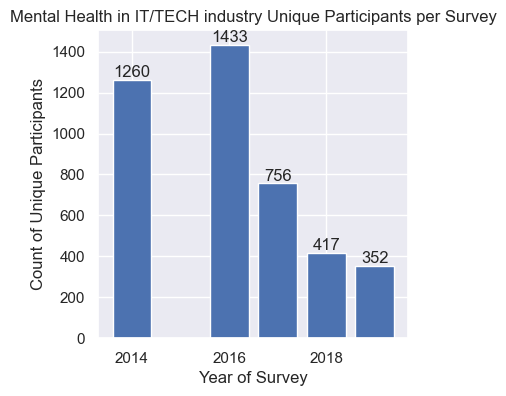

In [518]:
plt.figure(figsize=(4, 4))
plt.bar(sample_size_per_year["SurveyID"], sample_size_per_year["UniqueUsers"])

plt.bar_label(plt.gca().containers[0])

plt.title("Mental Health in IT/TECH industry Unique Participants per Survey")
plt.xlabel("Year of Survey")
plt.ylabel("Count of Unique Participants")
plt.show()

Figure contains 2014, 2016, 2017, 2018 and 2019 respondents per year. There is trend of lower amount of unque respondents from 2016. In 4 years respondents amount lower around 4 times. 2015 data was not included in the dataset. In the OSMI research page there are no explonation why survey was not shared for the 2015. In case you are interested you can see history and help to share your own views for the survey for 2024 https://osmhhelp.org/research.html. The 2024 survey will close on December 31st, 2024.

### Sociodemographic features

#### Age
What is average age of the respondents?
Average age of respondents is 33.9. Ages choosen between 18 and 80. No negatives or hundreds included in average.

In [913]:
print(f"Average respondent is {ages['age'].mean()} years old")

Average respondent is 33.85982865302237 years old


What is distribution of the age in survey data?

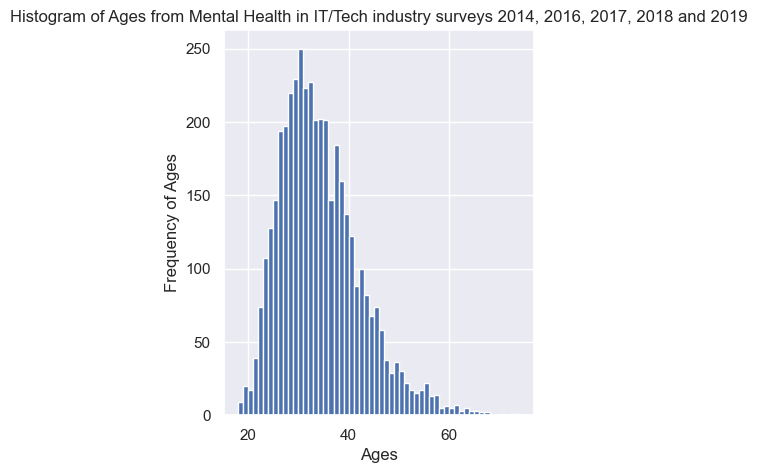

In [914]:
age_to_plot = ages["age"]

plt.figure(figsize=(4, 5))
plt.hist(
    age_to_plot,
    label="Mental health in IT/Teach industry Survey ages histogram",
    bins=np.arange(age_to_plot.min(), age_to_plot.max() + 1),
)

plt.xlabel("Ages")
plt.ylabel("Frequency of Ages")
plt.title(
    "Histogram of Ages from Mental Health in IT/Tech industry surveys 2014, 2016, 2017, 2018 and 2019"
)

plt.show()

The disribution of ages is a little right skewed with a center of about 33 years, a range of about 60 years(18 to 80).There might be outliers on the high end. Most of respondents belongs to work force in range of 27 to 35 years old.

#### Gender
What genders proportionally participated in the survey?

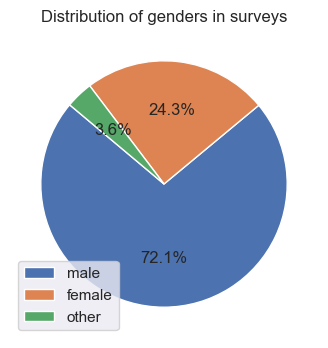

In [946]:
plt.figure(figsize=(4, 4))
plt.pie(gender_count, autopct="%1.1f%%", startangle=140)
plt.legend(gender_count.index)
plt.title("Distribution of genders in surveys")
plt.show()

In pie chart we can see that 72.1% respondents were male for all surveys. Other 3.5 % could be researched in future.

#### Country
What country do you live in? Question ID 3

United States of Amerika was replaced with United States. 5 TOP countries person lives in makes up to 83% of total unique respondents.

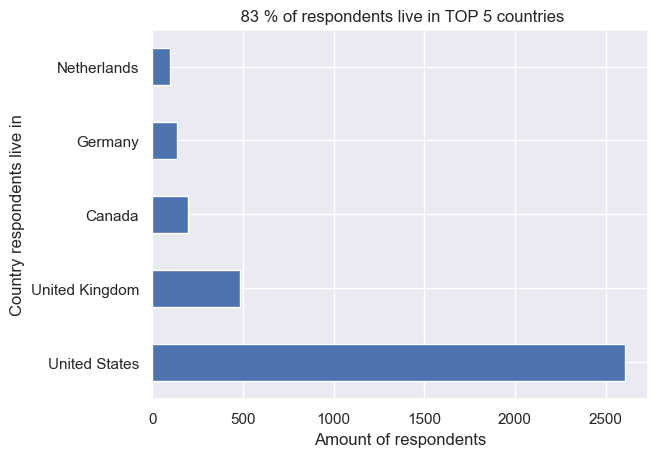

In [358]:
answer_table.loc[answer_table["QuestionID"] == 3, "AnswerText"] = answer_table.loc[
    answer_table["QuestionID"] == 3, "AnswerText"
].replace({"United States of America": "United States"}, regex=True)


country_living_counts = answer_table[answer_table["QuestionID"] == 3][
    "AnswerText"
].value_counts()


country_living_counts[:5].plot(
    kind="barh",
    ylabel="Country respondents live in",
    xlabel="Amount of respondents",
    title=" 83 % of respondents live in TOP 5 countries",
)


plt.show()

In what country average respondent lives in?
Average respondent lives in United States. 62 % of total participants lives in United States. Second place United Kingdom has around 5 times less responses.

In [365]:
print(
    f"Most respondents lives in {country_living_counts[:1]/answer_table['UserID'].unique().max()}"
)

Average respondents lives in AnswerText
United States    0.617354
Name: count, dtype: float64


#### Race
What is your race? QuestionID 89

From data we can see question about race introduced in 2017. From all 4218 respondents we have 1525 answers about race. 537 of those respondents choose not to fill their race. 

In [426]:
query = """
SELECT SurveyID, COUNT(AnswerText) AS AnswerCount
FROM Answer
WHERE QuestionID = 89
GROUP BY SurveyID
UNION ALL
SELECT 'Total' AS SurveyID, SUM(COUNT(AnswerText)) OVER () AS TotalCount
FROM Answer
WHERE QuestionID = 89; """

query_result = pd.read_sql(query, con)
query_result

,SurveyID,AnswerCount
0,2017,756
1,2018,417
2,2019,352
3,Total,1525


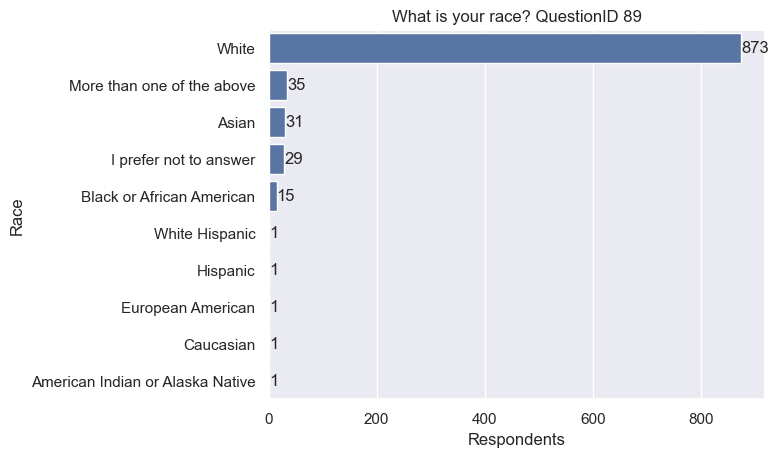

In [762]:
# What is your race? QuestionID89
query = """
SELECT AnswerText AS Race, COUNT(AnswerText) AS Respondents
FROM Answer
WHERE QuestionID = 89 AND AnswerText <> '-1'
GROUP BY AnswerText
ORDER BY Respondents DESC; """

query_result = pd.read_sql(query, con)
graph = sns.barplot(data=query_result, x="Respondents", y="Race", orient="h")
graph.set_title("What is your race? QuestionID 89")
graph.bar_label(graph.containers[0])
plt.show()

In the plot above What is your race? QuestionID 89 we can see what more than 80% of respondents listed their race as white.

#### Remote work
93 Do you work remotely (outside of an office) at least 50% of the time?
118	Do you work remotely?

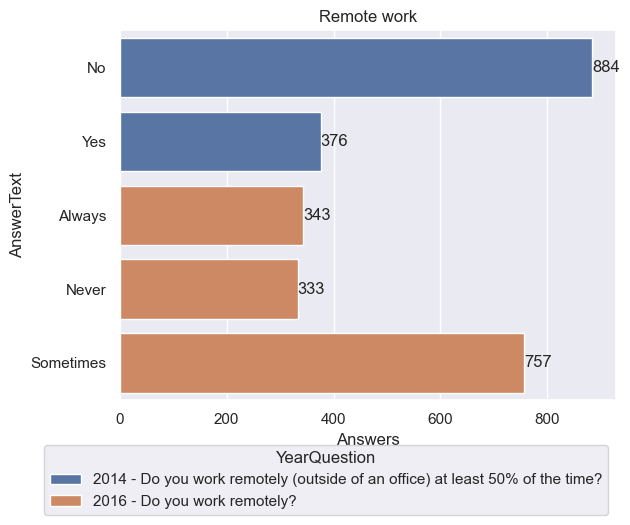

In [494]:
# Do you work remotely ? QuestionID93 and QuestionID118
pd.set_option("display.max_colwidth", None)
query = """
SELECT a.QuestionID, q.questiontext, a.`AnswerText`, COUNT(a.`AnswerText`) AS Answers, CAST(a.SurveyID AS TEXT) || ' - ' || q.questiontext AS YearQuestion
FROM `Answer` a
JOIN Question q ON q.questionid = a.QuestionID
WHERE q.questiontext LIKE '%remote%'
GROUP BY a.`AnswerText` 
ORDER BY a.QuestionID
; """

query_result = pd.read_sql(query, con)
query_result

graph = sns.barplot(
    data=query_result, x="Answers", y="AnswerText", orient="h", hue="YearQuestion"
)

graph.set_title("Remote work")
graph.bar_label(graph.containers[0])
graph.bar_label(graph.containers[1])
sns.move_legend(graph, "best", bbox_to_anchor=(1, -0.1))

In the graph there are two questions about remote work from Surveys. 
Question ID 93 Do you work remotely (outside of an office) at least 50% of the time? was presented in the 2014 Survey. In 2024 most of the respondents was not working remotely. In 2016 sitaution became reversed with 4 times more working from home more than working from the office.

#### Average Respondent
To sum up sociodemographic features from survey data average respondent is 34 year old living in United States works some time remotely, and is a white man. 
In the Survey research page there are no information about design of target population. This may lead to sample bias, due to research not designed to have proportioned data for the population. According to Forbes statistics data there are 36% females in tech industry, survey data has 24.3% females. White man working in tech according to Forbes is 11.5% lower than  survey data and is equal to 68.5%(survey data 80% white man). https://www.forbes.com/advisor/education/it-and-tech/tech-industry-statistics-and-facts/

## Prevalence of Mental health disorders

Formula for prevalence rate: Prevalence(P) = (No. of existing cases of disease/total amount of respondents). 95% confidence interval will be calculated using standartized normal distirbution and prevalence rate. This method choosen due to having one number for prevalence in the survey data.

In [578]:
query = """
SELECT t1.AnswerText,
         t1.Respondents,
  t1.P AS Prevalence_Rate,
  ROUND(t1.P-1.96*SQRT((t1.P*(1-t1.P))/ t1.total_count),2) AS Lower_bound,
  ROUND(t1.P+1.96*SQRT((t1.P*(1-t1.P))/ t1.total_count),2) AS Upper_bound 
  FROM
(SELECT AnswerText,
  COUNT(AnswerText) AS Respondents, 
  SUM(COUNT(AnswerText)) OVER() AS total_count,
  ROUND(CAST(COUNT(AnswerText) AS FLOAT) / CAST(SUM(COUNT(AnswerText)) OVER() AS FLOAT),2) AS P
FROM Answer
WHERE QuestionID = 115
GROUP BY AnswerText
ORDER BY Respondents DESC
LIMIT 3 OFFSET 1) as t1 """

query_result = pd.read_sql(query, con)
query_result

,AnswerText,Respondents,Prevalence_Rate,Lower_bound,Upper_bound
0,"Mood Disorder (Depression, Bipolar Disorder, etc)",412,0.20,0.18,0.22
1,"Anxiety Disorder (Generalized, Social, Phobia, etc)",345,0.17,0.15,0.19
2,Attention Deficit Hyperactivity Disorder,121,0.06,0.05,0.07


([<matplotlib.axis.XTick at 0x1e0d201e6f0>,
 [Text(0, 0, 'Mood Disorder'),
  Text(1, 0, 'Anxiety Disorder'),
  Text(2, 0, 'ADHD')])

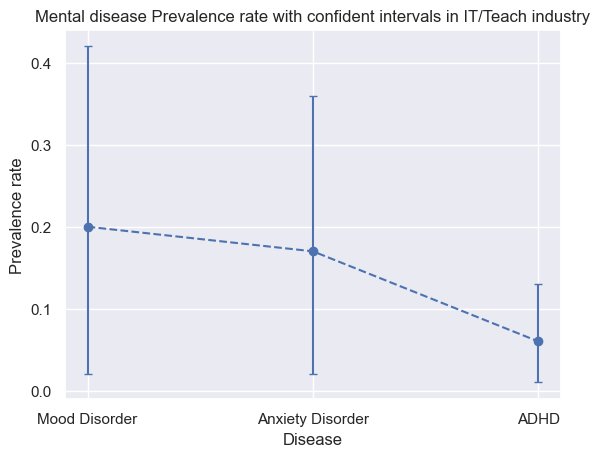

In [575]:
ci_lower = query_result["Lower_bound"]
ci_upper = query_result["Upper_bound"]

plt.errorbar(
    x=query_result["AnswerText"],
    y=query_result["Prevalence_Rate"],
    yerr=[ci_lower, ci_upper],
    capsize=3,
    fmt="b--o",
)

plt.title(
    "Mental disease Prevalence rate with confident intervals in IT/Teach industry"
)
plt.xlabel("Disease")
plt.ylabel("Prevalence rate")
plt.xticks([0, 1, 2], ["Mood Disorder", "Anxiety Disorder", "ADHD"])

Graph shows prevalence rate of diagnosed mental disease in population of the survey. Mood disorder has highest rate of 0.2 with 95% confidence interval moving 0.2. 20 percent of respondents has been diagnosed with mood disorder. Same confidence interval is for anxiety disorder with prevalence rate of 0.17. 
TOP 3 diseases diagnosed sums up to 43 % of respondents.

## Feature analysis

#### Questions selection

Let's compare several features(questions) for female and male respondents as well as diagnosed with mental heald disorder.
Survey has more than 100 questions. At this time to get into more details we choose to select year with majority of the same questions used. In 2017, 2018 and 2019 was used 76 same questions.

In [622]:
query = """
          SELECT COUNT(distinct(q.questionid)) AS 'Questions(same) amount used in 2017, 2018, 2019 surveys'
FROM `Answer` a
  FULL JOIN Question q ON a.QuestionID = q.questionid
      WHERE a.SurveyID IN (2017, 2018, 2019); """

questions_76 = pd.read_sql(query, con)
questions_76

,"Questions(same) amount used in 2017, 2018, 2019 surveys"
0,76


Questions for initial analysis choosen based on people with mental disease in the past and current, gender, company size, knowing about company health coverage and discussion about mental health in workplace. Questions provided below.


In [953]:
query = """
   SELECT questionid, questiontext
FROM Question
      WHERE questionid IN( 2, 6, 7, 8, 14, 32, 33, 58, 60, 70, 72) """

query_result = pd.read_sql(query, con)
query_result

,questionid,questiontext
0,2,What is your gender?
1,6,Do you have a family history of mental illness?
2,7,Have you ever sought treatment for a mental health disorder from a mental health professional?
3,8,How many employees does your company or organization have?
4,14,Do you know the options for mental health care available under your employer-provided health coverage?
5,32,Have you had a mental health disorder in the past?
6,33,Do you currently have a mental health disorder?
7,58,Have you ever discussed your mental health with your employer?
8,60,Have you ever discussed your mental health with coworkers?
9,70,Did you ever discuss your mental health with your previous employer?


#### Data frame loading
Filter relevant year and question ids to make a pivot table for analysis.

In [638]:
year_filter = (2017, 2018, 2019)
question_filter = (2, 6, 7, 8, 14, 32, 33, 58, 60, 70, 72)
filtered_answer_table_year = answer_table[answer_table["SurveyID"].isin(year_filter)]
filtered_answer_table_questions = filtered_answer_table_year[
    filtered_answer_table_year["QuestionID"].isin(question_filter)
]

pivot_table = filtered_answer_table_questions.pivot_table(
    index="UserID",
    columns="QuestionID",
    values="AnswerText",
    aggfunc=lambda x: " ".join(x),
)

pivot_table

C:\Users\Greta Prekerienė\AppData\Local\Temp\ipykernel_14316\2151404029.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_answer_table_questions = filtered_answer_table_year[answer_table['QuestionID'].isin(question_filter)]


QuestionID,2,6,7,8,14,32,33,58,60,70,72
UserID,,,,,,,,,,,
2694,female,No,1,100-500,Yes,Possibly,Possibly,0,1,0,0
2695,male,No,0,100-500,Yes,Possibly,Possibly,0,1,0,1
2696,male,Yes,1,6-25,No,Yes,Yes,1,1,0,1
2697,male,I don't know,1,More than 1000,Yes,No,Yes,1,1,-1,-1
2698,female,Yes,1,-1,-1,Yes,No,-1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4214,male,No,0,More than 1000,No,No,Possibly,0,0,0,0
4215,male,No,0,-1,-1,No,No,-1,-1,0,0
4216,male,No,0,-1,-1,No,No,-1,-1,-1,-1


#### Females and males feature comparrison

How different is past and current mental order diagnosed diseases for male gender?

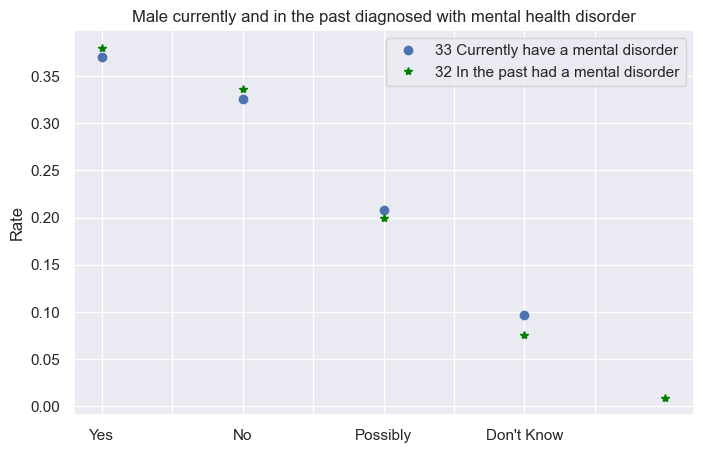

In [775]:
male = pivot_table[pivot_table[2] == "male"]
data_to_plot1 = male[33].value_counts(normalize=True)
data_to_plot2 = male[32].value_counts(normalize=True)

plt.figure(figsize=(8, 5))
data_to_plot1.plot(
    kind="line",
    label="33 Currently have a mental disorder",
    marker="o",
    linestyle="none",
)
data_to_plot2.plot(
    kind="line",
    color="green",
    label="32 In the past had a mental disorder",
    marker="*",
    linestyle="none",
)

plt.ylabel("Rate")
plt.title("Males currently and in the past diagnosed with mental health disorder")

plt.legend()
plt.show()

From the graph of past and current male gender diagnosed mental disorder we get similar results. Similar percentage of population who had mental disease has one at the time of the survey.
For Yes past diseases is a little bit higher, this may show what some of the people got better. But we have reverse situation for a NO answer, this indicates some got a new diagnosis. 
Last star in the graph shows missing values for this question.

Do more females than males had mental disorder in the past?

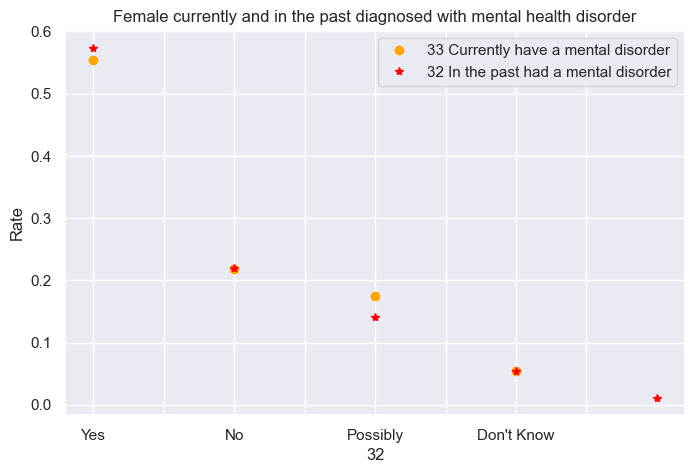

In [812]:
female = pivot_table[pivot_table[2] == "female"]
data_to_plot1 = female[33].value_counts(normalize=True)
data_to_plot2 = female[32].value_counts(normalize=True)

plt.figure(figsize=(8, 5))
data_to_plot1.plot(
    kind="line",
    color="orange",
    label="33 Currently have a mental disorder",
    marker="o",
    linestyle="none",
)
data_to_plot2.plot(
    kind="line",
    color="red",
    label="32 In the past had a mental disorder",
    marker="*",
    linestyle="none",
)

plt.ylabel("Rate")
plt.title("Females currently and in the past diagnosed with mental health disorder")
plt.legend()
plt.show()

Do more female had mental disorder in the past? Answer is slightly yes. Past and at the moment of filling survey there are no big difference. More than 50% of females had in the past and still has mental disorders.
In comparison with male female reports more than 20% with mental disorder cases in the survey.

In [816]:
def male_female_comparison(question_number):
    female = pivot_table[pivot_table[2] == "female"]
    male = pivot_table[pivot_table[2] == "male"]

    question_name = question_table["questiontext"][
        question_table["questionid"] == question_number
    ].to_string(index=False)

    print(
        f" Female answers for question {question_name} {female[question_number].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'}"
    )
    print(
        f" Male answers for question {question_name} {male[question_number].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'}"
    )

Do more females has a family history of mental illness?

In [819]:
male_female_comparison(6)

 Female answers for question Do you have a family history of mental illness? 6
Yes             58.0%
I don't know    22.0%
No              20.0%
Name: proportion, dtype: object
 Male answers for question Do you have a family history of mental illness? 6
Yes             40.2%
No              34.2%
I don't know    25.6%
Name: proportion, dtype: object


Yes, 18% more female than male has history of family mental illness. Not being sure about family mental health history percentage for male and female are similar 25.6% and 22% accordingly. Quarter of respondents of not knowing could impact data proportions.

Do more females seek professional treatment for a mental health disorder?

In [820]:
male_female_comparison(7)

 Female answers for question Have you ever sought treatment for a mental health disorder from a mental health professional? 7
1    73.7%
0    26.3%
Name: proportion, dtype: object
 Male answers for question Have you ever sought treatment for a mental health disorder from a mental health professional? 7
1    55.2%
0    44.8%
Name: proportion, dtype: object


Yes, near 20% more female seek help from mental health professionals. Same proportion of 20% as we saw in the diagnosed cases.

Do more females knows options for mental health care coverage from employer?

In [823]:
male_female_comparison(14)

 Female answers for question Do you know the options for mental health care available under your employer-provided health coverage? 14
Yes    44.2%
No     37.6%
-1     18.1%
Name: proportion, dtype: object
 Male answers for question Do you know the options for mental health care available under your employer-provided health coverage? 14
No     42.6%
Yes    33.3%
-1     24.1%
Name: proportion, dtype: object


Yes, about 10 % more female knows about employer-provided health coverage. Around 37% of male has a diagnosed mental health disorder

#### Having a mental health disorder feature comparrison

In [843]:
def sick_female_male_comparison(question_number):
    sick_now_female = pivot_table[
        (pivot_table[33] == "Yes") & (pivot_table[2] == "female")
    ]
    sick_now_male = pivot_table[(pivot_table[33] == "Yes") & (pivot_table[2] == "male")]
    compare1 = sick_now_female
    compare2 = sick_now_male

    question_name = question_table["questiontext"][
        question_table["questionid"] == question_number
    ].to_string(index=False)

    print(
        f" Female having current illness answers for question {question_name} {compare1[question_number].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'}"
    )
    print(
        f" Male having current illness answers for question {question_name} {compare2[question_number].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'}"
    )

In what size companies male and female with mental health disorder works?

In [845]:
sick_female_male_comparison(8)

 Female having current illness answers for question How many employees does your company or organization have? 8
More than 1000    29.1%
100-500           25.0%
26-100            14.3%
-1                11.5%
6-25              10.2%
500-1000           8.2%
1-5                1.6%
Name: proportion, dtype: object
 Male having current illness answers for question How many employees does your company or organization have? 8
More than 1000    27.7%
100-500           25.0%
-1                13.6%
26-100            12.8%
6-25              12.0%
500-1000           7.1%
1-5                1.9%
Name: proportion, dtype: object


Most of the male and female around 30% with mental health disorder works in the companies with more than 1000 employees.
Though size might not be important factor. In the table above for male and female percentage for companies with 500-1000 is less than in companies with 6-25 and 26-100 employees. 

Do females and males with mental health disorder knows about their company available health care coverage?

In [846]:
sick_female_male_comparison(14)

 Female having current illness answers for question Do you know the options for mental health care available under your employer-provided health coverage? 14
Yes    55.3%
No     27.0%
-1     17.6%
Name: proportion, dtype: object
 Male having current illness answers for question Do you know the options for mental health care available under your employer-provided health coverage? 14
Yes    45.1%
No     32.9%
-1     22.0%
Name: proportion, dtype: object


Around half of people with mental health disorders know about options in their company for the health care.

Do females and males who has a mental disorder currently had a disorder in the past?

In [847]:
sick_female_male_comparison(32)

 Female having current illness answers for question Have you had a mental health disorder in the past? 32
Yes           86.1%
Possibly       8.2%
No             2.5%
-1             2.0%
Don't Know     1.2%
Name: proportion, dtype: object
 Male having current illness answers for question Have you had a mental health disorder in the past? 32
Yes           74.2%
Possibly      14.4%
No             5.7%
Don't Know     3.3%
-1             2.4%
Name: proportion, dtype: object


Yes, both female and male who had a disorder in the past has a disorder. 86.1%  of female and 74.2%  male continue to have a mental health disorder.

Do people with mental health disorder discuss their mental health with employeer?

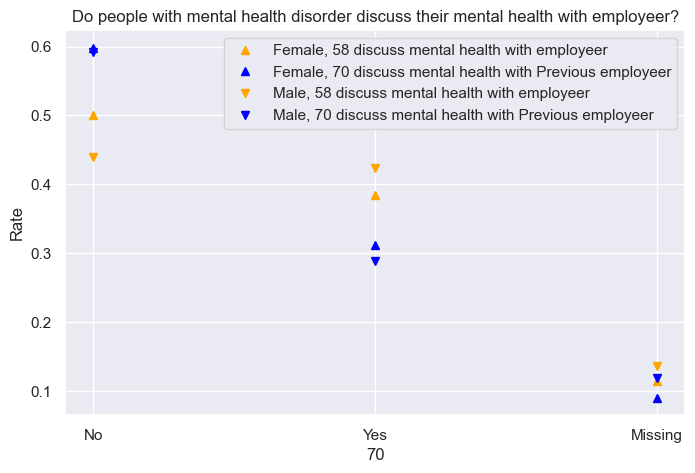

In [954]:
sick_now_female = pivot_table[(pivot_table[33] == "Yes") & (pivot_table[2] == "female")]
sick_now_male = pivot_table[(pivot_table[33] == "Yes") & (pivot_table[2] == "male")]
compare1 = sick_now_female
compare2 = sick_now_male


female = pivot_table[pivot_table[2] == "female"]
data_to_plot1 = sick_now_female[58].value_counts(normalize=True)
data_to_plot2 = sick_now_female[70].value_counts(normalize=True)
data_to_plot3 = sick_now_male[58].value_counts(normalize=True)
data_to_plot4 = sick_now_male[70].value_counts(normalize=True)


plt.figure(figsize=(8, 5))
data_to_plot1.plot(
    kind="line",
    color="orange",
    label="Female, 58 discuss mental health with employeer",
    marker="^",
    linestyle="none",
)
data_to_plot2.plot(
    kind="line",
    color="blue",
    label="Female, 70 discuss mental health with Previous employeer",
    marker="^",
    linestyle="none",
)
data_to_plot3.plot(
    kind="line",
    color="orange",
    label="Male, 58 discuss mental health with employeer",
    marker="v",
    linestyle="none",
)
data_to_plot4.plot(
    kind="line",
    color="blue",
    label="Male, 70 discuss mental health with Previous employeer",
    marker="v",
    linestyle="none",
)

plt.xticks([0, 1, 2], ["No", "Yes", "Missing"])
plt.ylabel("Rate")
plt.title(
    "Do people with mental health disorder discuss their mental health with employeer?"
)
plt.legend()
plt.show()

No, most of male and female with a health disorder do not discuss illness with employer. Around 60% of respondents choose not discuss mental health with Previous employer. With current employer 15% male and 10% female decided to change and talk about their mental health.

Do people with mental health disorder discuss their mental health with co-worker?

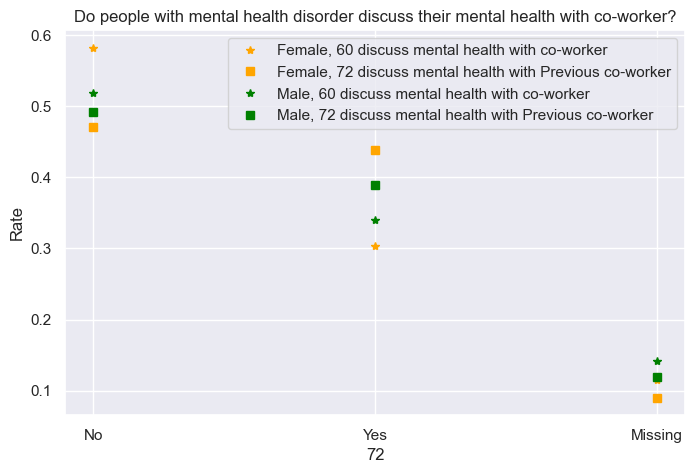

In [955]:
sick_now_female = pivot_table[(pivot_table[33] == "Yes") & (pivot_table[2] == "female")]
sick_now_male = pivot_table[(pivot_table[33] == "Yes") & (pivot_table[2] == "male")]
compare1 = sick_now_female
compare2 = sick_now_male


female = pivot_table[pivot_table[2] == "female"]
data_to_plot1 = sick_now_female[60].value_counts(normalize=True)
data_to_plot2 = sick_now_female[72].value_counts(normalize=True)
data_to_plot3 = sick_now_male[60].value_counts(normalize=True)
data_to_plot4 = sick_now_male[72].value_counts(normalize=True)


plt.figure(figsize=(8, 5))
data_to_plot1.plot(
    kind="line",
    color="orange",
    label="Female, 60 discuss mental health with co-worker",
    marker="*",
    linestyle="none",
)
data_to_plot2.plot(
    kind="line",
    color="orange",
    label="Female, 72 discuss mental health with Previous co-worker",
    marker="s",
    linestyle="none",
)
data_to_plot3.plot(
    kind="line",
    color="green",
    label="Male, 60 discuss mental health with co-worker",
    marker="*",
    linestyle="none",
)
data_to_plot4.plot(
    kind="line",
    color="green",
    label="Male, 72 discuss mental health with Previous co-worker",
    marker="s",
    linestyle="none",
)

plt.xticks([0, 1, 2], ["No", "Yes", "Missing"])
plt.ylabel("Rate")
plt.title(
    "Do people with mental health disorder discuss their mental health with co-worker?"
)
plt.legend()
plt.show()

Around 60% of female do not discuss mental health with co-workers. Around 50% of male do not discuss their mental health with co-worker. In the past 45 of females choose to discuss, but trend decrease by 15% to discuss with new co-workers.

## Summary

Half of population has a mental health disorder. Half of that do not discuss their health at work.
86% of females and 74% of males continue to have a mental health disorder at the time of the survey. Professional help seeks 70% of females and 55%  of males. Only half of people know about their mental health medical coverage options provided by their employer.


1. 43% of population diagnosed with mood disorder, anxiety disorder and Attention Deficit Hyperactivity Disorder.
2. 55% of female has a mental disorder, males - 37%.
3. Females choose not disclose illness in new jobs. 15% less females discuss their mental health in comparison with previous co-workers.
4. 50% of males do not discuss their mental health with current co-workers.



Possible improvements:
1. Incorporating some statistical tests (e.g., Chi-square test for categorical data) would validate whether the differences observed between males and females are statistically significant or due to chance.
2. Calculate more confidence intervals.
3. Trends over the years.
4. Grouping questions by answer types, personal views, company attitude or other factors.
5. Adding plot function.
6. Investigate data design to understand target population.


